In [8]:
!pip install cobra

     |████████████████████████████████| 2.4MB 6.4MB/s 
     |████████████████████████████████| 153kB 44.1MB/s 
     |████████████████████████████████| 102kB 11.1MB/s 
     |████████████████████████████████| 2.1MB 31.6MB/s 
     |████████████████████████████████| 6.2MB 13.6MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 10.1MB 19.9MB/s 
     |████████████████████████████████| 204kB 50.6MB/s 
     |████████████████████████████████| 51kB 188kB/s 
     |████████████████████████████████| 552kB 56.9MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import re
import json

from cobra import test

**Task 1**

1) DON
2) TPA
3) NIC

**Task 2**

In [ ]:
data = pd.read_csv('/content/data_for_task2.csv')
data

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [ ]:
fucus = data[data['genus'] == 'Fucus']
fucus_mean = fucus.mean()
fucus_mean

sucrose       4.355112
alanin        3.566411
citrate       4.214878
glucose       2.814803
oleic_acid    3.367647
dtype: float64

In [ ]:
saccharina = data[data['genus'] == 'Saccharina']
saccharina_mean = saccharina.mean()
saccharina_mean

sucrose       4.183596
alanin        3.524207
citrate       3.346710
glucose       4.980594
oleic_acid    4.487252
dtype: float64

In [ ]:
cladophora = data[data['genus'] == 'Cladophora']
cladophora_mean = cladophora.mean()
cladophora_mean

sucrose       4.008792
alanin        3.997055
citrate       5.288311
glucose       2.800276
oleic_acid    2.263472
dtype: float64

In [ ]:
palmaria = data[data['genus'] == 'Palmaria']
palmaria_mean = palmaria.mean()
palmaria_mean

sucrose       0.704580
alanin        3.176440
citrate       5.573905
glucose       3.242090
oleic_acid    2.245538
dtype: float64

In [ ]:
ascophyllum = data[data['genus'] == 'Ascophyllum']
ascophyllum_mean = ascophyllum.mean()
ascophyllum_mean

sucrose       6.825467
alanin        0.875429
citrate       5.253527
glucose       3.414961
oleic_acid    2.432526
dtype: float64

In [ ]:
means = {"fucus": fucus_mean,
        "saccharina": saccharina_mean,
        "cladophora": cladophora_mean,
        "palmaria" : palmaria_mean,
        "ascophyllum" : ascophyllum_mean}

df = pd.concat(means,
               axis = 1)

df = df.T
df = df.reset_index()
df = df.rename(columns={'index' : 'genus'})
df

,genus,sucrose,alanin,citrate,glucose,oleic_acid
0,fucus,4.355112,3.566411,4.214878,2.814803,3.367647
1,saccharina,4.183596,3.524207,3.346710,4.980594,4.487252
2,cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
3,palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
4,ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526


In [ ]:
long_df = pd.melt(
    frame = df,
    id_vars = 'genus')

long_df = long_df.rename(columns={'variable' : 'metabolite'})

long_df

,genus,metabolite,value
0,fucus,sucrose,4.355112
1,saccharina,sucrose,4.183596
2,cladophora,sucrose,4.008792
3,palmaria,sucrose,0.704580
4,ascophyllum,sucrose,6.825467
5,fucus,alanin,3.566411
6,saccharina,alanin,3.524207
7,cladophora,alanin,3.997055
8,palmaria,alanin,3.176440
9,ascophyllum,alanin,0.875429


[Text(0, 0, 'sucrose'),
 Text(0, 0, 'alanin'),
 Text(0, 0, 'citrate'),
 Text(0, 0, 'glucose'),
 Text(0, 0, 'oleic_acid')]

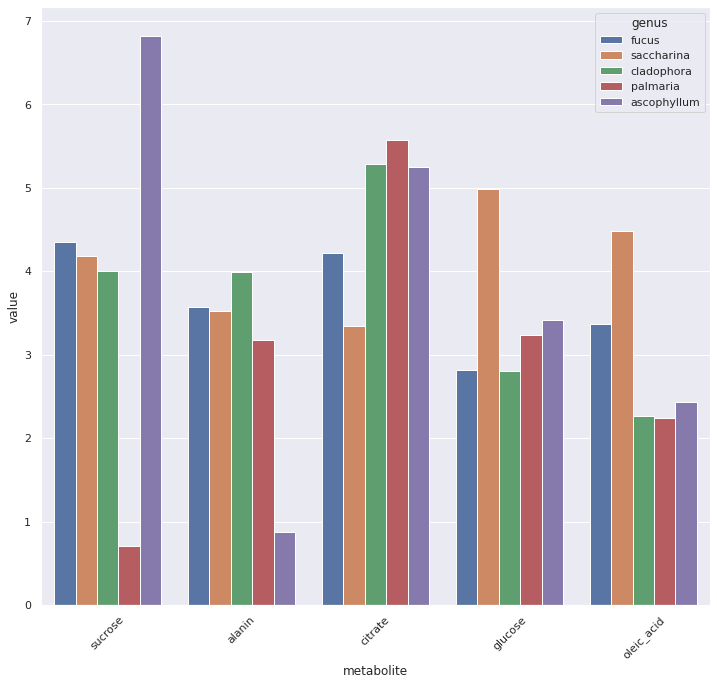

In [ ]:
sns.set(rc={'figure.figsize':(12,11)})

g = sns.barplot(x="metabolite",
                y="value", 
                hue="genus", 
                data = long_df)

g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

**Task 3**

In [ ]:
numbers = [1, 2, 3, 4, 5, 6]
my_iter = map(lambda x: True if x % 3 == 0 else False, numbers)
def f(iterable):
    while True:
        try:
            yield next(iterable)
        except StopIteration:
            break

<generator object f at 0x7f6bbfcb0250>


**Task 4**

In [4]:
nums = [22, 43, 264, 1990]

for num in nums:
    print("\t")
    print(requests.get("http://numbersapi.com/" + str(num) + "/math").text)
    print(requests.get("http://numbersapi.com/" + str(num) + "/trivia").text)

	
22 is the number of partitions of 8.
22 is the number of yards in a chain.
	
43 is the 14th smallest prime number.
43 is the maximum number of cars participating in a NASCAR race in the Cup Series or Nationwide Series.
	
264 is the largest known number whose square is undulating.
264 is a number for which we're missing a fact (submit one to numbersapi at google mail!).
	
1990 is a stella octangula number.
1990 is a boring number.


**Task 5**

In [10]:
model = test.create_test_model("textbook") # Name: e_coli_core

model.metabolites.nadh_c.summary(fva=0.95)
model.genes.b3236.knock_out()
model.optimize()
model.metabolites.nadh_c.summary(fva=0.95)

Percent,Flux,Range,Reaction,Definition
0.00%,0,[-1.513; 0],ACALD,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
18.46%,7.449,[0; 8.076],AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
0.00%,0,[-1.242; 0],ALCD2x,etoh_c + nad_c <=> acald_c + h_c + nadh_c
7.26%,2.929,[2.783; 2.929],Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
44.12%,17.8,[9.838; 17.91],GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.00%,0,[-1.188; 0],LDH_D,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
1.83%,0.738,[0; 11.9],ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
0.00%,0,[0; 44.63],NADTRHD,nad_c + nadph_c --> nadh_c + nadp_c
28.34%,11.43,[0.5791; 18.69],PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Range,Reaction,Definition
